In [ ]:
import logging
from itertools import product

import shapely
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

from searvey import usgs

logging.basicConfig(
    level=20,
    style="{",
    format="{asctime:s}; {levelname:8s}; {threadName:23s}; {name:<25s} {lineno:5d}; {message:s}",
)

logging.getLogger("urllib3").setLevel(30)
logging.getLogger("parso").setLevel(30)

logger = logging.getLogger(__name__)

## Retrieve Station Metadata

In [2]:
usgs_stations = usgs.get_usgs_stations()
usgs_stations

,agency_cd,site_no,station_nm,site_tp_cd,dec_lat_va,dec_long_va,coord_acy_cd,dec_coord_datum_cd,alt_va,alt_acy_va,...,ts_id,loc_web_ds,medium_grp_cd,parm_grp_cd,srs_id,access_cd,begin_date,end_date,count_nu,geometry
0,USGS,0234296910,CHATTAHOOCHEE RIVER AT COAST GUARD DOCK AT EUF...,LK,31.908216,-85.144932,U,NAD83,0.0,0.01,...,0,NaN,wat,NaN,0,0,2006-01-01,2022-01-01,14,POINT (-85.14493 31.90822)
1,USGS,0234296910,CHATTAHOOCHEE RIVER AT COAST GUARD DOCK AT EUF...,LK,31.908216,-85.144932,U,NAD83,0.0,0.01,...,298232,NaN,wat,NaN,1642503,0,2017-09-30,2023-02-02,1931,POINT (-85.14493 31.90822)
2,USGS,0234296910,CHATTAHOOCHEE RIVER AT COAST GUARD DOCK AT EUF...,LK,31.908216,-85.144932,U,NAD83,0.0,0.01,...,0,NaN,wat,NaN,0,0,1990-03-18,2017-02-22,28,POINT (-85.14493 31.90822)
3,USGS,0234296910,CHATTAHOOCHEE RIVER AT COAST GUARD DOCK AT EUF...,LK,31.908216,-85.144932,U,NAD83,0.0,0.01,...,234483,NaN,wat,NaN,1642503,0,2010-10-01,2023-02-03,4508,POINT (-85.14493 31.90822)
4,USGS,02464800,"LAKE TUSCALOOSA NEAR TUSCALOOSA, ALABAMA",LK,33.267339,-87.506116,S,NAD83,0.0,0.10,...,0,NaN,wat,NaN,0,0,2006-01-01,2022-01-01,17,POINT (-87.50612 33.26734)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244062,USGS,14240304,"SPIRIT LAKE AT TUNNEL AT SPIRIT LAKE, WA",LK,46.276221,-122.162597,S,NAD83,3470.0,10.00,...,152146,[LAKE LEVEL],wat,NaN,1642503,0,2007-10-01,2023-02-03,5604,POINT (-122.16260 46.27622)
244063,USGS,14240304,"SPIRIT LAKE AT TUNNEL AT SPIRIT LAKE, WA",LK,46.276221,-122.162597,S,NAD83,3470.0,10.00,...,152147,LEVEL AT INTAKE GATE,wat,NaN,1642503,0,2022-10-06,2023-02-03,120,POINT (-122.16260 46.27622)
244064,USGS,14240446,"CASTLE LAKE NEAR MOUNT ST. HELENS, WA",LK,46.256389,-122.274444,S,NAD83,NaN,NaN,...,0,NaN,wat,NaN,0,0,2006-01-01,2020-01-01,15,POINT (-122.27444 46.25639)
244065,USGS,14240446,"CASTLE LAKE NEAR MOUNT ST. HELENS, WA",LK,46.256389,-122.274444,S,NAD83,NaN,NaN,...,150471,NaN,wat,NaN,1642503,0,1993-10-01,2023-01-30,9729,POINT (-122.27444 46.25639)


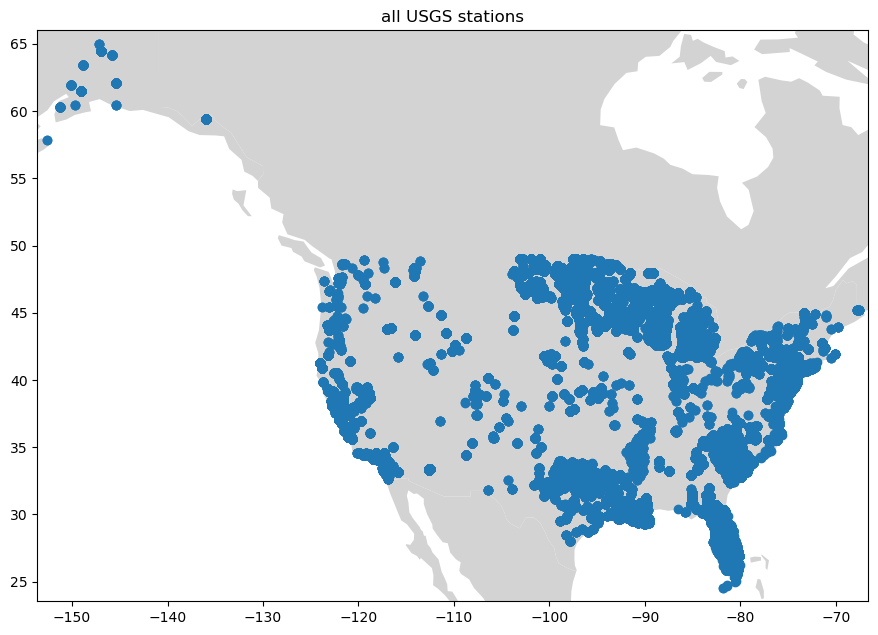

In [3]:
figure, axis = plt.subplots(1, 1)
figure.set_size_inches(12, 12 / 1.61803398875)

countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
_ = countries.plot(color="lightgrey", ax=axis, zorder=-1)
_ = usgs_stations.plot(ax=axis)
_ = axis.set_xlim(usgs_stations.total_bounds[0] - 1, usgs_stations.total_bounds[2] + 1)
_ = axis.set_ylim(usgs_stations.total_bounds[1] - 1, usgs_stations.total_bounds[3] + 1)
_ = axis.set_title(f"all USGS stations")

In [4]:
usgs_stations.columns

Index(['agency_cd', 'site_no', 'station_nm', 'site_tp_cd', 'dec_lat_va',
       'dec_long_va', 'coord_acy_cd', 'dec_coord_datum_cd', 'alt_va',
       'alt_acy_va', 'alt_datum_cd', 'huc_cd', 'data_type_cd', 'parm_cd',
       'stat_cd', 'ts_id', 'loc_web_ds', 'medium_grp_cd', 'parm_grp_cd',
       'srs_id', 'access_cd', 'begin_date', 'end_date', 'count_nu',
       'geometry'],
      dtype='object')

## Retrieve station metadata from arbitrary polygon

In [5]:
us_northeast = shapely.geometry.box(-75, 40, -70, 45)
us_northeast

ne_stations = usgs.get_usgs_stations(region=us_northeast)
ne_stations

,agency_cd,site_no,station_nm,site_tp_cd,dec_lat_va,dec_long_va,coord_acy_cd,dec_coord_datum_cd,alt_va,alt_acy_va,...,ts_id,loc_web_ds,medium_grp_cd,parm_grp_cd,srs_id,access_cd,begin_date,end_date,count_nu,geometry
0,USGS,425227073212401,RE 108,GW,42.874375,-73.356731,H,NAD83,451.0,4.3,...,0,NaN,wat,NaN,1642461,0,2017-03-09,2017-03-09,1,POINT (-73.35673 42.87438)
1,USGS,425227073212401,RE 108,GW,42.874375,-73.356731,H,NAD83,451.0,4.3,...,0,NaN,wat,NaN,1642461,0,2017-03-09,2017-03-09,1,POINT (-73.35673 42.87438)
2,USGS,425227073212401,RE 108,GW,42.874375,-73.356731,H,NAD83,451.0,4.3,...,0,NaN,wat,NaN,1642008,0,2017-03-09,2017-03-09,1,POINT (-73.35673 42.87438)
3,USGS,425227073212401,RE 108,GW,42.874375,-73.356731,H,NAD83,451.0,4.3,...,233087,NaN,wat,NaN,0,0,2017-03-06,2017-03-08,2,POINT (-73.35673 42.87438)
4,USGS,425227073212401,RE 108,GW,42.874375,-73.356731,H,NAD83,451.0,4.3,...,217132,NaN,wat,NaN,1642461,0,2017-02-22,2017-03-09,15,POINT (-73.35673 42.87438)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6668,USGS,422302071083801,"FRESH POND IN GATE HOUSE AT CAMBRIDGE, MA",LK,42.383889,-71.143889,S,NAD83,27.6,5.0,...,67561,NaN,wat,NaN,1644459,0,2009-10-01,2023-02-03,4873,POINT (-71.14389 42.38389)
6669,USGS,422302071083801,"FRESH POND IN GATE HOUSE AT CAMBRIDGE, MA",LK,42.383889,-71.143889,S,NAD83,27.6,5.0,...,67557,[(2)],wat,NaN,0,0,2007-10-01,2023-02-03,5604,POINT (-71.14389 42.38389)
6670,USGS,422302071083801,"FRESH POND IN GATE HOUSE AT CAMBRIDGE, MA",LK,42.383889,-71.143889,S,NAD83,27.6,5.0,...,67560,Fresh Pond Sonde,wat,NaN,1646694,0,2007-10-01,2023-02-03,5604,POINT (-71.14389 42.38389)
6671,USGS,422302071083801,"FRESH POND IN GATE HOUSE AT CAMBRIDGE, MA",LK,42.383889,-71.143889,S,NAD83,27.6,5.0,...,225988,"Huron Ave Gatehouse, [Data provided by CWD]",wat,NaN,1643311,0,2022-10-06,2023-02-03,120,POINT (-71.14389 42.38389)


In [6]:
ne_stations[ne_stations.begin_date > "2022"]

,agency_cd,site_no,station_nm,site_tp_cd,dec_lat_va,dec_long_va,coord_acy_cd,dec_coord_datum_cd,alt_va,alt_acy_va,...,ts_id,loc_web_ds,medium_grp_cd,parm_grp_cd,srs_id,access_cd,begin_date,end_date,count_nu,geometry
141,USGS,01096508,"MERRIMACK RIVER AT NASHUA, NH",ST,42.763422,-71.442843,S,NAD83,0.0,0.01,...,309650,NaN,wat,NaN,17164583,0,2022-10-06,2023-02-03,120,POINT (-71.44284 42.76342)
539,USGS,01209510,"SAUGATUCK RIVER AT ROUTE 1 AT WESTPORT, CT",ES,41.140894,-73.363033,5,NAD83,0.0,0.10,...,0,NaN,wat,ALL,0,0,2022-04-05,2023-01-17,22,POINT (-73.36303 41.14089)
540,USGS,01209510,"SAUGATUCK RIVER AT ROUTE 1 AT WESTPORT, CT",ES,41.140894,-73.363033,5,NAD83,0.0,0.10,...,0,NaN,wat,INF,0,0,2022-04-05,2023-01-17,22,POINT (-73.36303 41.14089)
541,USGS,01209510,"SAUGATUCK RIVER AT ROUTE 1 AT WESTPORT, CT",ES,41.140894,-73.363033,5,NAD83,0.0,0.10,...,0,NaN,wat,PHY,1645597,0,2022-04-05,2023-01-17,22,POINT (-73.36303 41.14089)
542,USGS,01209510,"SAUGATUCK RIVER AT ROUTE 1 AT WESTPORT, CT",ES,41.140894,-73.363033,5,NAD83,0.0,0.10,...,0,NaN,wat,PHY,1645720,0,2022-04-05,2023-01-17,22,POINT (-73.36303 41.14089)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6151,USGS,04294500,"LAKE CHAMPLAIN AT BURLINGTON, VT",LK,44.476160,-73.221517,S,NAD83,0.0,0.05,...,253418,NaN,wat,NaN,1642503,0,2022-06-01,2023-02-03,247,POINT (-73.22152 44.47616)
6553,USGS,04295000,RICHELIEU R (LAKE CHAMPLAIN) AT ROUSES POINT NY,LK,44.996278,-73.359806,1,NAD83,NaN,NaN,...,245276,NaN,wat,NaN,1642503,0,2022-10-06,2023-02-03,120,POINT (-73.35981 44.99628)
6594,USGS,410606073245700,NORWALK RIVER AT NORWALK AQUARIUM NR S NORWALK...,ES,41.101619,-73.415947,H,NAD83,4.0,1.60,...,0,NaN,wat,BIO,86546,0,2022-03-15,2023-01-03,20,POINT (-73.41595 41.10162)
6656,USGS,420717071221301,"KINGSBURY POND NEAR NORFOLK, MA",LK,42.121389,-71.370278,S,NAD83,NaN,NaN,...,320743,NaN,wat,NaN,1642503,0,2023-01-09,2023-02-03,25,POINT (-71.37028 42.12139)


## Retrieve USGS station data

In [7]:
ne_data = usgs.get_usgs_data(
    usgs_metadata=ne_stations,
    endtime="2020-05-30",
    period=3,
)
ne_data

100%|███████████████████████████████████████████████████████████████████████████████| 4/4 [00:22<00:00,  5.73s/it]


<xarray.Dataset>
Dimensions:    (site_no: 78, datetime: 1133, code: 7, option: 8)
Coordinates:
  * site_no    (site_no) object '01063995' '01098499' ... '422302071083801'
  * datetime   (datetime) datetime64[ns] 2020-05-27T04:00:00 ... 2020-05-31T0...
  * code       (code) object '00062' '62614' '62615' ... '62620' '63160' '72279'
  * option     (option) object '' '2' ... 'test' 'upstream of weir'
Data variables:
    value      (site_no, datetime, code, option) object nan nan nan ... nan nan
    qualifier  (site_no, datetime, code, option) object nan nan nan ... nan nan
    lon        (site_no) float64 -70.51 -71.38 -71.27 ... -70.06 -70.05 -71.14
    lat        (site_no) float64 43.78 42.32 42.42 42.4 ... 41.93 41.93 42.38
    unit       (code) object 'ft' 'ft' 'ft' 'ft' 'ft' 'ft' 'ft'
    name       (code) object 'Elevation of reservoir water surface above datu...

In [10]:
def drop_all_nan_coords(ds: xr.Dataset) -> xr.Dataset:
    for coord in ds.coords:
        ds = ds.isel({
            coord: np.where(
                ds.value.notnull().sum([dim for dim in ds.coords if dim != coord])
            )[0]
        })

    return ds

ds = ne_data.isel(code=ne_data.name.str.contains('ocean')).sel(option='navd88').squeeze().reset_coords()
ds = drop_all_nan_coords(ds)
ds

<xarray.Dataset>
Dimensions:    (site_no: 20, datetime: 806, code: 1)
Coordinates:
  * site_no    (site_no) object '01302250' '01302600' ... '01372043' '01376562'
  * datetime   (datetime) datetime64[ns] 2020-05-27T05:00:00 ... 2020-05-31T0...
  * code       (code) object '62620'
Data variables:
    option     <U6 'navd88'
    value      (site_no, datetime, code) object 2.35 2.36 2.38 ... nan 0.66 nan
    qualifier  (site_no, datetime, code) object 'A' 'A' 'A' 'A' ... nan 'A' nan
    lon        (site_no) float64 -73.71 -73.64 -73.59 ... -73.76 -73.94 -74.13
    lat        (site_no) float64 40.87 40.89 40.91 40.96 ... 42.62 41.72 40.54
    unit       (code) object 'ft'
    name       (code) object 'Estuary or ocean water surface elevation above ...

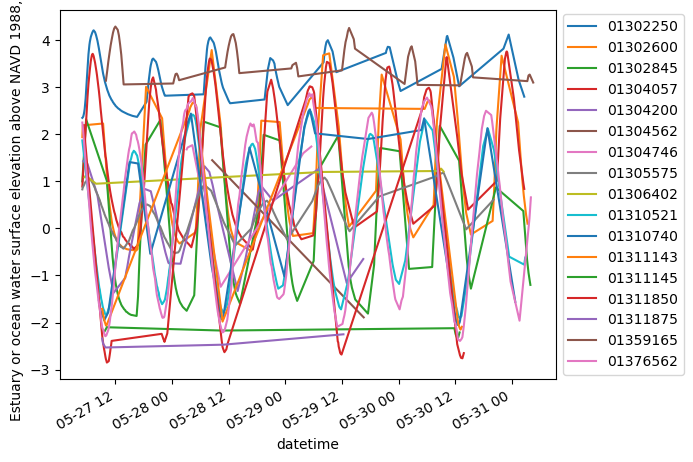

In [11]:
fig, axes = plt.subplots(1, 1)

for st in ds.site_no:
    da = ds.sel(site_no=st, code=cd).reset_coords().value.dropna('datetime').astype('float64')
    if da.size < 2:
        continue

    _ = da.plot(ax=axes, label=st.values)
    _ = axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    _ = axes.set_ylabel(ds.name.isel(code=0).values)
